In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from pandas.plotting import scatter_matrix

from app import Bank
import app.utils

In [3]:
bank = Bank('DKB')
print(f'Bank: {bank.name}')

Bank: DKB


## Accounts

In [4]:
bank.accounts

,id,firstname,lastname,balance


## Transactions

In [5]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp


## Open Accounts

In [6]:
bank.open_account(account_id=1, firstname='Dalia', lastname='Das')
bank.open_account(account_id=2, firstname='Matthias', lastname='Rettenmeier')
bank.open_account(account_id=3, firstname='Manuel', lastname='Wiedenmann')

,id,firstname,lastname,balance
0,1,Dalia,Das,0.0
1,2,Matthias,Rettenmeier,0.0
2,3,Manuel,Wiedenmann,0.0


## Add transactions

In [7]:
bank.add_transaction(transaction_id=0,
                     sender_id=1,
                     recipient_id=2,
                     subject='Mein Weltbild',
                     amount=100.0,
                     category='Bücher',
                     timestamp=datetime.datetime.utcnow())

In [8]:
transactions = [
    {'transaction_id': 1,
     'sender_id': 1,
     'recipient_id': 2,
     'subject': 'Data Science für Dummies',
     'amount': 26.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 2,
     'sender_id': 1,
     'recipient_id': 3,
     'subject': 'Python programmieren lernen für Dummies',
     'amount': 19.99,
     'category': 'Bücher',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 3,
     'sender_id': 3,
     'recipient_id': 1,
     'subject': 'Mittagessen',
     'amount': 20.,
     'category': 'Essen',
     'timestamp': app.utils.random_timestamp()},
    {'transaction_id': 4,
     'sender_id': 2,
     'recipient_id': 3,
     'subject': 'Drinks',
     'amount': 40.,
     'category': 'Lifestyle',
     'timestamp': app.utils.random_timestamp()},
]

for transaction in transactions:
    bank.add_transaction(**transaction)
    
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680
3,3,3,1,20.00,Mittagessen,Essen,2018-10-31 10:52:31.227683
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686


In [9]:
bank.transactions.describe()

,amount
count,5.000000
mean,41.396000
std,33.763575
min,19.990000
25%,20.000000
50%,26.990000
75%,40.000000
max,100.000000


## .groupby() + agg()

In [10]:
grouped_by_category = bank.transactions.groupby('category')

In [11]:
grouped_by_category.agg({'amount': 'count'})

,amount
category,
Bücher,3
Essen,1
Lifestyle,1


In [12]:
grouped_by_category.agg({'amount': 'sum'})

,amount
category,
Bücher,146.98
Essen,20.00
Lifestyle,40.00


In [13]:
grouped_by_category.agg({'amount': 'max'})

,amount
category,
Bücher,100.0
Essen,20.0
Lifestyle,40.0


In [14]:
grouped_by_category.agg({'amount': 'min'})

,amount
category,
Bücher,19.99
Essen,20.00
Lifestyle,40.00


In [15]:
grouped_by_sender_id = bank.transactions.groupby('sender_id')

In [16]:
grouped_by_sender_id.agg({'amount': 'sum'})

,amount
sender_id,
1,146.98
2,40.00
3,20.00


In [17]:
grouped_by_recipient_id = bank.transactions.groupby('recipient_id')

In [18]:
grouped_by_recipient_id.agg({'amount': 'sum'})

,amount
recipient_id,
1,20.00
2,126.99
3,59.99


### Tasks

- Group by sender_id
- Group by recipient_id


## Cleanup

In [19]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680
3,3,3,1,20.00,Mittagessen,Essen,2018-10-31 10:52:31.227683
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686


In [20]:
bank.transactions.drop_duplicates('id', inplace=True)

In [21]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680
3,3,3,1,20.00,Mittagessen,Essen,2018-10-31 10:52:31.227683
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686


In [22]:
bank.transactions.sort_values('timestamp', inplace=True)

In [23]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680
3,3,3,1,20.00,Mittagessen,Essen,2018-10-31 10:52:31.227683
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196


## Add columns

In [24]:
# Wir erstellen eine neue Column tax_amount indem wir die Column amount mit 0.19 multiplizieren
bank.transactions['tax_amount'] = bank.transactions['amount'] * 0.19

In [25]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663,5.1281
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680,3.7981
3,3,3,1,20.00,Mittagessen,Essen,2018-10-31 10:52:31.227683,3.8000
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686,7.6000
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196,19.0000


In [26]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663,5.1281
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680,3.7981
3,3,3,1,20.00,Mittagessen,Essen,2018-10-31 10:52:31.227683,3.8000
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686,7.6000
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196,19.0000


### Tasks

- [.apply() docs](http://pandas.pydata.org/pandas-docs/version/0.24/reference/api/pandas.DataFrame.apply.html)

In [27]:
# Unser dict zum Zuordnen der richtigen Steuersätze
# Key ist die Category, der value ist der Stuersatz
tax_rates = {
    'Bücher': 0.07,
    'Essen': 0.07,
    'Lifestyle': 0.19,
}

# Erstelle eine neue Column tax_rate indem du auf der Column category .apply() aufrufst
# Nutze das tax_rates dict in der lambda function von .apply()
bank.transactions['tax_rate'] = bank.transactions['category'].apply(lambda category: tax_rates[category])

In [28]:
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663,5.1281,0.07
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680,3.7981,0.07
3,3,3,1,20.00,Mittagessen,Essen,2018-10-31 10:52:31.227683,3.8000,0.07
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686,7.6000,0.19
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196,19.0000,0.07


In [29]:
bank.transactions['new_tax_amount'] = bank.transactions['amount'] * bank.transactions['tax_rate']
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,new_tax_amount
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663,5.1281,0.07,1.8893
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680,3.7981,0.07,1.3993
3,3,3,1,20.00,Mittagessen,Essen,2018-10-31 10:52:31.227683,3.8000,0.07,1.4000
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686,7.6000,0.19,7.6000
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196,19.0000,0.07,7.0000


In [30]:
bank.transactions['total_amount'] = bank.transactions['amount'] + bank.transactions['new_tax_amount']
bank.transactions

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,new_tax_amount,total_amount
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663,5.1281,0.07,1.8893,28.8793
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680,3.7981,0.07,1.3993,21.3893
3,3,3,1,20.00,Mittagessen,Essen,2018-10-31 10:52:31.227683,3.8000,0.07,1.4000,21.4000
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686,7.6000,0.19,7.6000,47.6000
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196,19.0000,0.07,7.0000,107.0000


## Filter with .loc[]

In [31]:
# Filter alle Bücher
bank.transactions.loc[bank.transactions['category'] == 'Bücher']

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,new_tax_amount,total_amount
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663,5.1281,0.07,1.8893,28.8793
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680,3.7981,0.07,1.3993,21.3893
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196,19.0000,0.07,7.0000,107.0000


In [34]:
# Filter alle Transaktionen mit einem amount > 20

bank.transactions.loc[bank.transactions['amount'] > 20]

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,new_tax_amount,total_amount
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663,5.1281,0.07,1.8893,28.8793
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686,7.6000,0.19,7.6000,47.6000
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196,19.0000,0.07,7.0000,107.0000


In [38]:
# Filter alle Bücher mit einem amount > 20

# Erst die Bücher
books = bank.transactions.loc[bank.transactions['category'] == 'Bücher']

# Dann den amount
books_with_amount_greater_20 = books.loc[bank.transactions ['amount'] > 20]

books_with_amount_greater_20

,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,new_tax_amount,total_amount
1,1,1,2,26.99,Data Science für Dummies,Bücher,2018-03-24 10:52:31.227663,5.1281,0.07,1.8893,28.8793
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196,19.0000,0.07,7.0000,107.0000


In [49]:
# Filter alle Transaktionen nach einem Datum (timestamp)
timestamp = app.utils.random_timestamp()
print(timestamp)

bank.transactions.loc[bank.transactions['timestamp'] > timestamp]

2018-05-25 11:26:50.047778


,id,sender_id,recipient_id,amount,subject,category,timestamp,tax_amount,tax_rate,new_tax_amount,total_amount
2,2,1,3,19.99,Python programmieren lernen für Dummies,Bücher,2018-07-20 10:52:31.227680,3.7981,0.07,1.3993,21.3893
3,3,3,1,20.00,Mittagessen,Essen,2018-10-31 10:52:31.227683,3.8000,0.07,1.4000,21.4000
4,4,2,3,40.00,Drinks,Lifestyle,2018-12-12 10:52:31.227686,7.6000,0.19,7.6000,47.6000
0,0,1,2,100.00,Mein Weltbild,Bücher,2019-02-12 10:52:31.100196,19.0000,0.07,7.0000,107.0000


## Plots

In [50]:
by_timestamp = bank.transactions.set_index('timestamp')

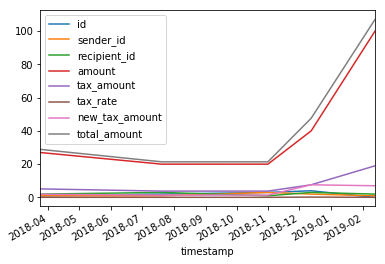

In [51]:
by_timestamp.plot()

In [41]:
print (by_timestamp)

                           id sender_id recipient_id  amount  \
timestamp                                                      
2018-03-24 10:52:31.227663  1         1            2   26.99   
2018-07-20 10:52:31.227680  2         1            3   19.99   
2018-10-31 10:52:31.227683  3         3            1   20.00   
2018-12-12 10:52:31.227686  4         2            3   40.00   
2019-02-12 10:52:31.100196  0         1            2  100.00   

                                                            subject  \
timestamp                                                             
2018-03-24 10:52:31.227663                 Data Science für Dummies   
2018-07-20 10:52:31.227680  Python programmieren lernen für Dummies   
2018-10-31 10:52:31.227683                              Mittagessen   
2018-12-12 10:52:31.227686                                   Drinks   
2019-02-12 10:52:31.100196                            Mein Weltbild   

                             category  tax_amount  ta